# 23. GRADUATE ADMISSION: MODEL TRAINING 1
---

## 1. Presenting Our Objectives

- We will training 4 different models to find the best:
    - OLS Linear Regression
    - ElasticNet Linear Regression
    - K-Nearest Neighbors Regression
    - Random Forest Regression
    
- We will build prediction models in 2 different ways:
    - Manual: design one feature that will be used for a univariate model
    - Traditional: design models as it is usually done (train all features and see the results)
    
- We will work on 4 different variations of our data
    - Data 1: No changes to the dataset
    - Data 2: Continuous features are discretized (binned)
    - Data 3: Remove target outliers and 
        - bin continous features if `Data 2` were better than `Data 1`, 
        - no binning if `Data 2` were worse than `Data 1`
    - Data 4: change the objective into a multiple-classification problem by changing our target
        - `1=admit` right away
        - `2=waitlist`, the applicant is told to wait for spot to open
        - `3=no chance`, tell the applicant "good luck in your future endeavors"
        
- We could end up training 4x2x4=`32 variations of models` if we did everything mentioned above and that would be time consuming. Instead let's work on regular data and manually design a feature that would predict well. We can then do the same with all the features!

## 2. Introducing Data 1
#### `No changes to the dataset`

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

admission = pd.read_csv('data/Admission_1.1.csv')
admission['LOR'] = admission['LOR ']
admission['Chance of Admit'] = admission['Chance of Admit ']
admission_1 = admission.drop(['Serial No.', 'LOR ', 'Chance of Admit '], axis=1)
print(admission_1.shape)
print(admission_1.columns)
admission.head()

(500, 8)
Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA',
       'Research', 'LOR', 'Chance of Admit'],
      dtype='object')


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,LOR,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92,4.5,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76,4.5,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72,3.5,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80,2.5,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65,3.0,0.65


In [2]:
from sklearn.model_selection import train_test_split

train_1, test_1 = train_test_split(admission_1, test_size=0.2, random_state=42)
print('Train:', train_1.shape, '\n', 'Test:', test_1.shape)

Train: (400, 8) 
 Test: (100, 8)


## 3. Manual Model: Feature Engineering

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
manual_cols = admission_1.columns
manual_df1_ = admission_1.copy()
manual_df1_[manual_cols] = scaler.fit_transform(admission_1)
manual_df1_.head()

,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research,LOR,Chance of Admit
0,0.94,0.929,0.75,0.875,0.913,1.0,0.875,0.921
1,0.68,0.536,0.75,0.750,0.663,1.0,0.875,0.667
2,0.52,0.429,0.50,0.500,0.385,1.0,0.625,0.603
3,0.64,0.643,0.50,0.625,0.599,1.0,0.375,0.730
4,0.48,0.393,0.25,0.250,0.452,0.0,0.500,0.492


In [4]:
corr_matrix = admission_1.corr()
sorted_corr = corr_matrix['Chance of Admit'].sort_values(ascending=False)
sorted_corr

Chance of Admit      1.000
CGPA                 0.882
GRE Score            0.810
TOEFL Score          0.792
University Rating    0.690
SOP                  0.684
LOR                  0.645
Research             0.546
Name: Chance of Admit, dtype: float64

In [5]:
manual_df1 = pd.DataFrame()
manual_df1['CGPA'] = manual_df1_['CGPA']*0.882
manual_df1['GRE Score'] = manual_df1_['GRE Score']*0.810
manual_df1['TOEFL Score'] = manual_df1_['TOEFL Score']*0.792
manual_df1['U Rating'] = manual_df1_['University Rating']*0.690
manual_df1['SOP'] = manual_df1_['SOP']*0.684
manual_df1['LOR'] = manual_df1_['LOR']*0.645
manual_df1['Research'] = manual_df1_['Research']*0.546
manual_df1.head()

,CGPA,GRE Score,TOEFL Score,U Rating,SOP,LOR,Research
0,0.806,0.761,0.735,0.517,0.599,0.564,0.546
1,0.585,0.551,0.424,0.517,0.513,0.564,0.546
2,0.339,0.421,0.339,0.345,0.342,0.403,0.546
3,0.529,0.518,0.509,0.345,0.428,0.242,0.546
4,0.399,0.389,0.311,0.172,0.171,0.323,0.000


In [6]:
manual_df1['sum_all'] = manual_df1.sum(axis=1)
manual_df1['Admit'] = admission_1['Chance of Admit']
manual_df1.head()

,CGPA,GRE Score,TOEFL Score,U Rating,SOP,LOR,Research,sum_all,Admit
0,0.806,0.761,0.735,0.517,0.599,0.564,0.546,4.529,0.92
1,0.585,0.551,0.424,0.517,0.513,0.564,0.546,3.701,0.76
2,0.339,0.421,0.339,0.345,0.342,0.403,0.546,2.736,0.72
3,0.529,0.518,0.509,0.345,0.428,0.242,0.546,3.117,0.80
4,0.399,0.389,0.311,0.172,0.171,0.323,0.000,1.765,0.65


## 4. Manual Model Training

In [7]:
manual_train, manual_test = train_test_split(manual_df1[['sum_all', 'Admit']], 
                                             test_size=0.2, random_state=42)
X_train_m = np.array(manual_train['sum_all']).reshape(-1,1)
y_train_m = np.array(manual_train['Admit']).reshape(-1,1)
X_test_m = np.array(manual_test['sum_all']).reshape(-1,1)
y_test_m = np.array(manual_test['Admit']).reshape(-1,1)

### 4.i. Ordinary Least Square (OLS) Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

ols = LinearRegression()
ols_mse = cross_val_score(ols, X_train_m, y_train_m, cv=4, n_jobs=-1, 
                             scoring="neg_mean_squared_error") 
ols_rmse = np.sqrt(np.absolute(ols_mse))
print('RMSE:', ols_rmse)
print('Avg_RMSE:', ols_rmse.mean())
print('Std_RMSE:', ols_rmse.std())

RMSE: [0.06864894 0.06767559 0.0728208  0.06286173]
Avg_RMSE: 0.06800176808065761
Std_RMSE: 0.003541478727803767


### 4.ii. K-Nearest Neighbor Regression

In [9]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7, 
                        p=1, weights='distance')
knn_mse = cross_val_score(knn, X_train_m, y_train_m, cv=4, n_jobs=-1, 
                             scoring="neg_mean_squared_error") 
knn_rmse = np.sqrt(np.absolute(knn_mse))
print('RMSE:', knn_rmse)
print('Avg_RMSE:', knn_rmse.mean())
print('Std_RMSE:', knn_rmse.std())

RMSE: [0.06913591 0.07703129 0.07785775 0.06781602]
Avg_RMSE: 0.07296024087187286
Std_RMSE: 0.004517952449207948


### 4.iii. Random Forest Regressor

In [10]:
from sklearn.ensemble import RandomForestRegressor

ranfo = RandomForestRegressor(max_depth=6, min_samples_leaf=2,
                            min_samples_split=2, random_state=42)
ranfo_mse = cross_val_score(ranfo, X_train_m, y_train_m, cv=4, n_jobs=-1, 
                             scoring="neg_mean_squared_error") 
ranfo_rmse = np.sqrt(np.absolute(ranfo_mse))
print('RMSE:', ranfo_rmse)
print('Avg_RMSE:', ranfo_rmse.mean())
print('Std_RMSE:', ranfo_rmse.std())

RMSE: [0.06734248 0.07700776 0.07338614 0.06147664]
Avg_RMSE: 0.06980325514633862
Std_RMSE: 0.005918824332469005


It looks like simple linear regression is the best model, which should not be too surprising considering that our one feature was built based on correlation coefficients. 

## 5. Manual Model Testing

In [12]:
from sklearn.metrics import mean_squared_error

ols = LinearRegression()
ols.fit(X_train_m, y_train_m)
y_pred_m = ols.predict(X_test_m)
mse_t = mean_squared_error(y_test_m, y_pred_m)
rmse_t = np.sqrt(mse_t)
print('MSE_test:', mse_t)
print('RMSE_test:', rmse_t)

MSE_test: 0.004449119841371931
RMSE_test: 0.06670172292656264


Text(0, 0.5, 'Actual')

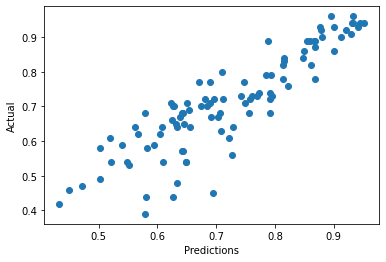

In [13]:
import matplotlib.pyplot as plt
plt.plot(y_pred_m, y_test_m, marker='o',linestyle='')
plt.xlabel('Predictions')
plt.ylabel('Actual')

## 6. Tradition Model Training

In [15]:
X_train_1 = train_1.drop(['Chance of Admit'], axis=1)
y_train_1 = train_1['Chance of Admit']
train_cols = X_train_1.columns
X_train_1_ = X_train_1.copy()

scaler_1 = MinMaxScaler()
X_train_1_[train_cols] = scaler_1.fit_transform(X_train_1)
X_train_1_.head()

,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research,LOR
249,0.62,0.679,0.50,0.625,0.651,1.0,0.714
433,0.52,0.679,0.75,0.750,0.558,0.0,1.000
19,0.26,0.357,0.50,0.625,0.545,0.0,0.429
322,0.48,0.536,0.25,0.375,0.471,0.0,0.714
332,0.36,0.500,0.50,0.625,0.452,1.0,0.286


### 6.i. OLS Linear Regression

In [16]:
ols = LinearRegression()
ols_mse = cross_val_score(ols, X_train_1, y_train_1, cv=4, n_jobs=-1, 
                             scoring="neg_mean_squared_error") 
ols_rmse = np.sqrt(np.absolute(ols_mse))
print('RMSE:', ols_rmse)
print('Avg_RMSE:', ols_rmse.mean())
print('Std_RMSE:', ols_rmse.std())

RMSE: [0.06540536 0.0581786  0.06867028 0.04981636]
Avg_RMSE: 0.06051764814754032
Std_RMSE: 0.007251620276179554


So far this is better than our manual model

### 6.ii. K-Nearest Neighbor Regression

In [18]:
from sklearn.model_selection import GridSearchCV

kpar = {'n_neighbors': np.arange(1, 21, 2),
       'weights': ['uniform', 'distance'],
       'algorithm': ['ball_tree', 'kd_tree', 'brute'],
       'p': [1,2]
      }
knn = KNeighborsRegressor()
kgrid = GridSearchCV(knn, kpar, n_jobs=-1)
kgrid.fit(X_train_1, y_train_1)

print('Best Parameters:', kgrid.best_params_)
print('Best Score:', kgrid.best_score_)

Best Parameters: {'algorithm': 'brute', 'n_neighbors': 19, 'p': 1, 'weights': 'distance'}
Best Score: 0.7575148294372659


In [20]:
knn_1 = KNeighborsRegressor(algorithm='brute', n_neighbors=19, 
                        p=1, weights='distance')
knn_mse = cross_val_score(knn_1, X_train_1, y_train_1, cv=4, n_jobs=-1, 
                             scoring="neg_mean_squared_error") 
knn_rmse = np.sqrt(np.absolute(knn_mse))
print('RMSE:', knn_rmse)
print('Avg_RMSE:', knn_rmse.mean())
print('Std_RMSE:', knn_rmse.std())

RMSE: [0.06808276 0.06919328 0.07593892 0.06249623]
Avg_RMSE: 0.06892779865567943
Std_RMSE: 0.004777695020884413


This is worse than our manual model

### 6.iii. Random Forest Regressor

In [22]:
ranpar = {'max_depth': [2, 4, 6, 8],
          'min_samples_leaf': [1, 2, 3, 4],
          'min_samples_split':[2, 3, 4, 5]
         }
ran = RandomForestRegressor()
rangrid = GridSearchCV(ran, ranpar, n_jobs=-1)
rangrid.fit(X_train_1, y_train_1)

print('Best Parameters:', rangrid.best_params_)
print('Best Score:', rangrid.best_score_)

Best Parameters: {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 4}
Best Score: 0.788081544462485


In [23]:
ranfo = RandomForestRegressor(max_depth=6, min_samples_leaf=3,
                            min_samples_split=4)
ranfo_mse = cross_val_score(ranfo, X_train_1, y_train_1, cv=4, n_jobs=-1, 
                             scoring="neg_mean_squared_error") 
ranfo_rmse = np.sqrt(np.absolute(ranfo_mse))
print('RMSE:', ranfo_rmse)
print('Avg_RMSE:', ranfo_rmse.mean())
print('Std_RMSE:', ranfo_rmse.std())

RMSE: [0.06910717 0.06178669 0.06871608 0.05752871]
Avg_RMSE: 0.06428466302599448
Std_RMSE: 0.004867668163151691


This is slightly better than the manual estimate and therefore is the winner!
Let's observe feature importances

## 7. Random Forest Feature Importances

In [24]:
X_importances = rangrid.best_estimator_.feature_importances_
sorted(X_importances, reverse=True)

[0.8005055449039419,
 0.13020359226996298,
 0.021818315525143992,
 0.015153023439748873,
 0.014262284786634495,
 0.009797935093118434,
 0.008259303981449239]

In [26]:
ranfo_df = pd.DataFrame()
ranfo_df['X_columns'] = X_train_1.columns
ranfo_df['X_importances'] = X_importances
ranfo_df_sorted = ranfo_df.sort_values(by=['X_importances'], 
                                       ascending=False
                                      )
ranfo_df_sorted

,X_columns,X_importances
4,CGPA,0.801
0,GRE Score,0.130
1,TOEFL Score,0.022
6,LOR,0.015
3,SOP,0.014
5,Research,0.010
2,University Rating,0.008


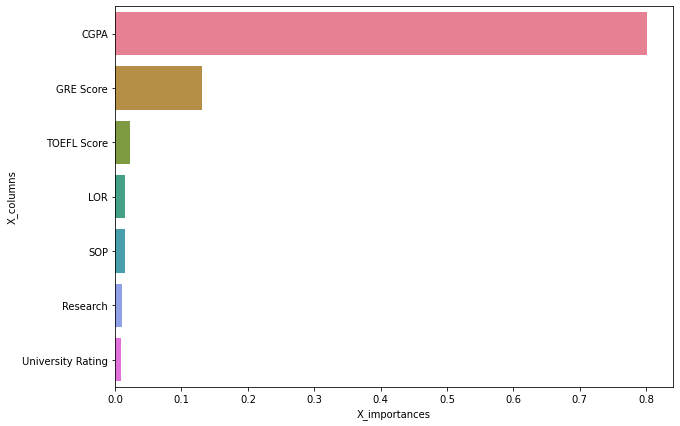

In [30]:
import seaborn as sns

ranfo_df_ = ranfo_df_sorted
plt.figure(figsize=(10,7))
ax = sns.barplot(x='X_importances', y='X_columns', data=ranfo_df_, palette="husl")

#### Another way

In [31]:
feature_importance = pd.DataFrame(sorted(zip(rangrid.best_estimator_.feature_importances_, X.columns)), 
                                  columns=['Value','Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('Random Forest Feature Importance')

NameError: name 'X' is not defined